<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**

# <font color='blus'>Indexation d'images</font>

Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Du coup, vous vous demandez ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc réaliser un index de l’ensemble de la base de données d’images qu’ils possèdent, pour classer les chiens par races.

**<font color='blus'>Les données</font>**

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous développerez un algorithme en utilisant le Stanford Dogs Dataset pour entraîner votre algorithme.

**<font color='blus'>Votre mission</font>**

En tant que Data Scientist, l'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

**<font color='blus'>Contraintes</font>**

Lors de ce projet, vous mettrez en œuvre deux approches.

* Une approche classique : il s’agit de pre-processer des images avec des techniques spécifiques (e.g.whitening, equalisation, filtre linéaire/laplacien/gaussien, éventuellement modifier la taille des images), puis d’extraire des features (e.g. texture, corners, edges et SIFT detector). Il faut ensuite réduire les dimensions, soit par des approches classiques (e.g. PCA, k-means) soit avec une approche par histogrammes et dictionary learning (bag-of-words appliqué aux images), puis appliquer des algorithmes de classification standards.



* Lors de l’analyse exploratoire, vous regarderez si les features extraites et utilisées en classification sont prometteuses en utilisant des méthodes de réduction de dimension pour visualiser le dataset en 2D. Cela vous permettra d’affiner votre intuition sur les différents traitements possibles, sans que cela ne se substitue à des mesures de performances rigoureuses.



* Une approche s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels). Compte tenu de la taille et de la complexité du dataset, et de la puissance de calcul à votre disposition, il est très difficile d’obtenir de bonnes performances (pour ça, essayez MNIST). Aussi, est-il recommandé d’utiliser le transfer learning, c’est-à-dire utiliser un réseau déjà entraîné, et le modifier pour répondre à votre problème. Une première chose obligatoire est de ré-entraîner les dernières couches pour prédire les classes qui vous intéressent seulement. Il est également possible d’adapter la structure (supprimer certaines couches par exemple) ou de ré-entraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

***Ce notebook est dédié aux tests en pré-déploiement du composant `oP7_DataBreed`.***

In [1]:
from IPython.display import display, clear_output

import P7_DataBreed
import p5_util

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


#### `oP7_DataBreed` update

* When source file `P7_DataBreed.py` is changed, then next instruction has to be activated for update.

In [2]:
import P7_DataBreed
if False:
    oP7_DataBreed = P7_DataBreed.update_object_save(oP7_DataBreed, is_saved=False,is_new_attribute=False)
    oP7_DataBreed.show()

#### `oP7_DataBreed` object is loaded

In [3]:
import p5_util
import P7_DataBreed
if True :
    filename = './data/oP7_DataBreed.dump'
    oP7_DataBreed = p5_util.object_load(filename)
    oP7_DataBreed.show()

p5_util.object_load : fileName= ./data/oP7_DataBreed.dump

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : Random Forest
Supported classifiers ......... : ['Bernoulli NB', 'Random Forest', 'L.R. + multinomial', 'Gaussian NB', 'Line

#### Display list of breeds to be tested

In [4]:
oP7_DataBreed.breed_show()



INFO : Series already built!
Building...
Breed directory= n02107142-Doberman              Breed name= Doberman
Breed directory= n02115641-dingo                 Breed name= dingo
Breed directory= n02113978-Mexican_hairless      Breed name= Mexican_hairless


#### From a selected breed, list of images file names are displayed

In [5]:
breedname = 'n02115641-dingo'
list_image_name = oP7_DataBreed.image_show(breedname)

Directory breed name = ./data/Images/n02115641-dingo Nb of images = 156

Number of images =156
n02115641_1560.jpg n02115641_3977.jpg n02115641_5178.jpg n02115641_3862.jpg n02115641_1969.jpg n02115641_10261.jpg n02115641_5823.jpg n02115641_13269.jpg n02115641_1674.jpg n02115641_9686.jpg n02115641_3995.jpg n02115641_11717.jpg n02115641_1940.jpg n02115641_877.jpg n02115641_4607.jpg n02115641_10604.jpg n02115641_6639.jpg n02115641_10992.jpg n02115641_12836.jpg n02115641_5033.jpg n02115641_13605.jpg n02115641_12981.jpg n02115641_2440.jpg n02115641_925.jpg n02115641_2096.jpg n02115641_3214.jpg n02115641_6579.jpg n02115641_10286.jpg n02115641_7355.jpg n02115641_2871.jpg n02115641_2636.jpg n02115641_6974.jpg n02115641_9396.jpg n02115641_14084.jpg n02115641_9067.jpg n02115641_12709.jpg n02115641_3736.jpg n02115641_2764.jpg n02115641_6747.jpg n02115641_10021.jpg n02115641_12148.jpg n02115641_7679.jpg n02115641_6577.jpg n02115641_10506.jpg n02115641_7013.jpg n02115641_6250.jpg n02115641_5492.jpg 

#### Use M.L. classifier in order to predict breed from an image file name

In [12]:
if False :
    count_predicted = 0
    i =0
    count = len(list_image_name)
    for image_name in list_image_name :
        breedname_result, list_predicted, pil_image_requested = oP7_DataBreed.predict(breedname, image_name, is_displayed=False)
        if breedname_result == list_predicted[0] :
            count_predicted +=1
        i+=1
        print(str(i)+"/"+str(count))
    print("Prediction accuracy for breed= "+str(breedname_result)+" : "+str(100*count_predicted/count)+"%")

In [13]:
dogfilemane = 'n02115641_3862.jpg'

---> Loading image
---> Building SIFT descriptors...
---> Build BOF issued from SIFT descriptors...
---> Breed prediction...

===> Classifier= Random Forest
===> Expected breed= dingo
===> Returned top predictions= ['Doberman', 'dingo', 'Mexican_hairless']


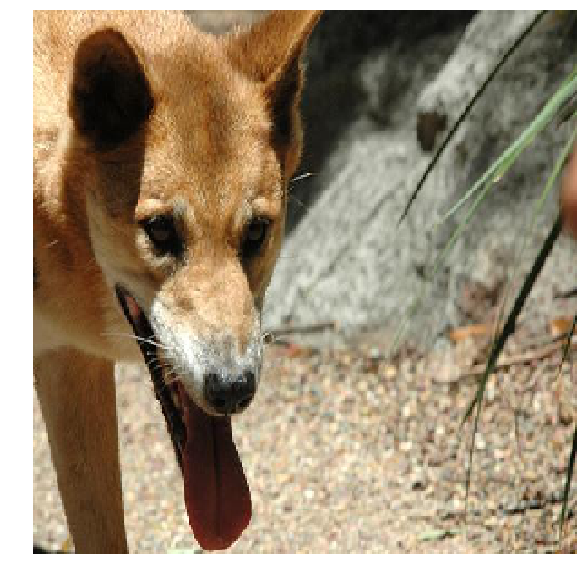

In [14]:
import p7_util
import P7_DataBreed

breedname_result, list_predicted, pil_image_requested = oP7_DataBreed.predict(breedname, dogfilemane, is_displayed=True)

#### Use Neural network in order to predict breed from image file name

---> Loading image
--->Data pre-processing for Keras NN ... 
Image count = 1
INFO : number of Image errors = 0
INFO : number of Label errors = 0
150528
Top 3 :
--->Breed prediction ... 
--->Breed name extracted ... 

===> Classifier= mlp
===> Expected breed= dingo
===> Returned top predictions= ['dingo', 'Mexican_hairless', 'Doberman']


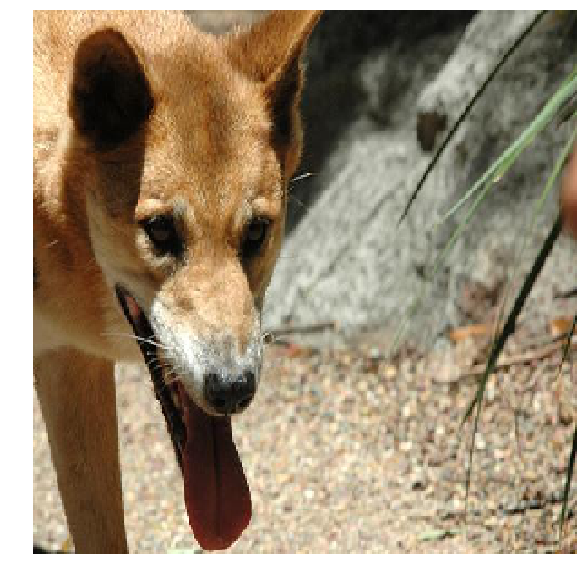

['dingo', 'Mexican_hairless', 'Doberman']


In [15]:
import P7_DataBreed
oP7_DataBreed.nn_model_name = 'mlp'
breedname_result, list_predicted, pil_image_requested = oP7_DataBreed.predict(breedname, dogfilemane\
                                                                              ,classifier_name = 'mlp')
if 0 < len(list_predicted):
    print(list_predicted)
else : 
    print("Returned list is empty!")
if pil_image_requested is not None :
    pil_image_requested


#### Use Neural network in order to predict breed from image file name

---> Loading image
--->Data pre-processing for Keras NN ... 
Image count = 1
INFO : number of Image errors = 0
INFO : number of Label errors = 0
150528
Top 3 :
--->Breed prediction ... 
--->Breed name extracted ... 

===> Classifier= cnn
===> Expected breed= dingo
===> Returned top predictions= ['dingo', 'Mexican_hairless', 'Doberman']


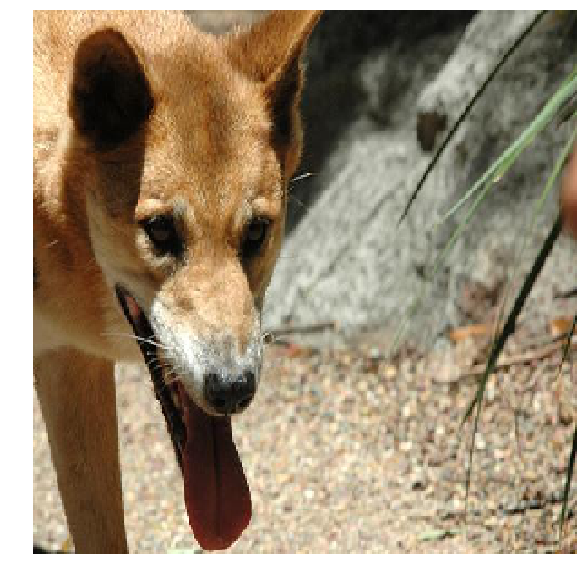

['dingo', 'Mexican_hairless', 'Doberman']


In [16]:
import P7_DataBreed
oP7_DataBreed.nn_model_name = 'cnn'
breedname_result, list_predicted, pil_image_requested = oP7_DataBreed.predict(breedname, dogfilemane\
                                                                              ,classifier_name = 'cnn')
if 0 < len(list_predicted):
    print(list_predicted)
else : 
    print("Returned list is empty!")
if pil_image_requested is not None :
    pil_image_requested
